Продакт-менеджер Василий попросил вас проанализировать завершенные уроки и ответить на следующие вопросы:

1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов).

2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. (5 баллов)

3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). (5 баллов) 

4. Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3). (8 баллов)

5. Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов. (10 баллов) 

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 0.1 до 0.5, monetary от 55 до 72 баллов. Описание подхода можно найти тут. (35 баллов)

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

Файлы: 

assessments.csv — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).
code_module — идентификационный код предмета.

code_presentation — семестр (Идентификационный код).

id_assessment — тест (Идентификационный номер ассессмента).

assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

courses.csv — файл содержит список предметов по семестрам.
code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код).

module_presentation_length — продолжительность семестра в днях.

studentAssessment.csv — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.
id_assessment — тест (идентификационный номер).

id_student — идентификационный номер студента.

date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

studentRegistration.csv — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.
code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код)

id_student — идентификационный номер студента.

date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
assessments=pd.read_csv('/home/jupyter-d.zelenkova-16/E-lerning project/assessments.csv')
studentRegistration=pd.read_csv('/home/jupyter-d.zelenkova-16/E-lerning project/studentRegistration.csv')
courses=pd.read_csv('/home/jupyter-d.zelenkova-16/E-lerning project/courses.csv')
studentAssessment=pd.read_csv('/home/jupyter-d.zelenkova-16/E-lerning project/studentAssessment.csv')

In [3]:
# задание №1
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [334]:
studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [335]:
# объединим два датафрейма, чтобы понять какие студенты как сдавали экзамены
df=studentAssessment.merge(assessments, on='id_assessment') 

In [336]:
# нужны только те студенты, кто успешно сдал экзамен ('score >= 40'), выберем тех,
# кто сдал только один, то есть прошел только один курс
df.query('assessment_type=="Exam"').query('score >=40')\
.groupby(['id_student','code_module'], as_index=False).agg({'code_module': 'count'})\
.sort_values('code_module').query('code_module==1')

,id_student,code_module
0,23698,1
2917,627750,1
2918,627772,1
2919,627879,1
2920,627882,1
...,...,...
1463,550814,1
1462,550814,1
1461,550762,1
1460,550725,1


In [337]:
# однако, немного посмотрев на данные, я поняла, что вид задания "Exam" присутствет только у двух курсов,
#видимо у остальных курсов в конце просто нет теста типа "экзамен" 

In [338]:
df.query('assessment_type=="Exam"')\
.groupby('code_module', as_index=False)\
.agg({'assessment_type': 'count'})

,code_module,assessment_type
0,CCC,1915
1,DDD,3044


In [339]:
#поэтому я решила посмотреть, сколько людей выполнело все задания,
#сначала исколючив тех студентов, которые не выполнили одно или больше заданий на курсе

In [340]:
failure = df.query('score < 40' or 'score=="Nan"').\
groupby('id_student', as_index=False).agg({'date': 'count'})

In [341]:
#получили список тех, кто курс не закончил
failure

,id_student,date
0,24734,1
1,25572,1
2,26315,1
3,27189,2
4,27417,1
...,...,...
4857,2694788,2
4858,2696376,3
4859,2697630,1
4860,2698251,1


In [342]:
#теперь найдем количество всех студентов, которые проходили курсы 
a = df.groupby(['id_student','code_module'], as_index=False).agg({'date': 'count'})

In [343]:
a

,id_student,code_module,date
0,6516,AAA,5
1,8462,DDD,7
2,11391,AAA,5
3,23629,BBB,4
4,23698,CCC,8
...,...,...,...
25082,2698257,AAA,5
25083,2698535,CCC,4
25084,2698535,EEE,4
25085,2698577,BBB,5


In [398]:
#теперь найдем какие студенты сколько курсов проходили и отберем тех, кто проходил только один
a=a.groupby('id_student', as_index=False).agg({'code_module': 'count'})\
.sort_values('code_module').query('code_module==1')

In [399]:
a

,id_student,code_module
0,6516,1
14444,626061,1
14443,626055,1
14442,626049,1
14441,626046,1
...,...,...
7216,543533,1
7215,543510,1
7214,543482,1
7222,543643,1


In [346]:
 #а теперь исключим тех, кто сдал не все задания(то есть не закончил курс)
a.loc[~a['id_student'].isin(failure.id_student)]

,id_student,code_module
0,6516,1
15354,623989,1
15353,623988,1
15352,623968,1
15351,623955,1
...,...,...
7460,540713,1
7477,540947,1
7513,541586,1
8159,549898,1


In [347]:
#так мы получаем 17494 студента, которые прошли только один курс
#note: мы не знаем в какой момент времени мы получили данные,мы посчитали только тех,
#кто выполнил все предложенные тесты,
#поэтому, нужно учитывать, что некоторые из этих людей не смогут закончить курс до конца,
#а некоторые наоборот закончат, пересдав, например, тест, который завалили

In [348]:
# я нашла еще один способ узнать сколько людей закончили курс: 
#в файле studentRegistration есть колонка date_unregistration, из которой мы можем узнать кто из 
#зарегистрированных закончил курс, а кто - нет

In [349]:
#выберем тех, кто курс закончил ("date_unregistration == 'NaN'")
# и посчитаем сколько студентов закончило только один курс
studentRegistration.query("date_unregistration == 'NaN'").groupby('id_student', as_index=False)\
.agg({'code_module': 'nunique'}).sort_values('code_module').query('code_module == 1')

,id_student,code_module
0,6516,1
13963,623289,1
13962,623276,1
13961,623263,1
13959,623240,1
...,...,...
7436,550725,1
7419,550545,1
7411,550429,1
6886,543607,1


In [350]:
#так мы получим 19945 человек,закончивших ТОЧНО закончивших курс

In [351]:
#задание №2
#так как в предыдущем задании я выяснила что не все курсы имеют задания типа "Exam",
#мне кажется нужным посмотреть завершаемость по всем типам заданий 

In [352]:
#сначала сгруппируем курсы по номерам заданий и типам заданий
# и посчитаем сколько всего студентов должны были их сделать
total_trials=df.groupby(['code_module','id_assessment','assessment_type'], as_index=False)\
.agg({'score': 'count'}).rename(columns={'score': 'total_trials'})

In [353]:
total_trials

,code_module,id_assessment,assessment_type,total_trials
0,AAA,1752,TMA,358
1,AAA,1753,TMA,342
2,AAA,1754,TMA,330
3,AAA,1755,TMA,303
4,AAA,1756,TMA,298
...,...,...,...,...
183,GGG,37439,CMA,504
184,GGG,37440,CMA,479
185,GGG,37441,CMA,473
186,GGG,37442,CMA,416


In [354]:
#теперь посмотрим сколько студентов успешно выполнили задание
successful_trials=df.query('score >=40')\
.groupby(['code_module','id_assessment','assessment_type'], as_index=False)\
.agg({'score': 'count'}).rename(columns={'score': 'successful_trials'})

In [355]:
successful_trials

,code_module,id_assessment,assessment_type,successful_trials
0,AAA,1752,TMA,352
1,AAA,1753,TMA,330
2,AAA,1754,TMA,325
3,AAA,1755,TMA,294
4,AAA,1756,TMA,290
...,...,...,...,...
183,GGG,37439,CMA,503
184,GGG,37440,CMA,466
185,GGG,37441,CMA,470
186,GGG,37442,CMA,396


In [356]:
# объединим таблицы и посчитаем рейтинг завершаемости каждого задания
rate=total_trials.merge(successful_trials, on=['code_module','id_assessment','assessment_type'])
rate['rate']=rate['successful_trials'] / rate['total_trials']

In [357]:
# здесь мы видим самое сложное задание
rate.sort_values('rate').head(1)

,code_module,id_assessment,assessment_type,total_trials,successful_trials,rate
43,BBB,15020,TMA,1772,1040,0.586907


In [358]:
#самых простых заданий оказалось несколько
rate.sort_values('rate', ascending=False)

,code_module,id_assessment,assessment_type,total_trials,successful_trials,rate
147,FFF,34896,CMA,747,747,1.000000
174,GGG,37429,CMA,559,559,1.000000
131,FFF,34879,CMA,1352,1352,1.000000
157,FFF,34907,CMA,1234,1234,1.000000
143,FFF,34892,CMA,857,857,1.000000
...,...,...,...,...,...,...
52,CCC,24286,CMA,1346,1089,0.809064
71,DDD,25339,TMA,496,392,0.790323
85,DDD,25353,TMA,843,664,0.787663
92,DDD,25360,TMA,448,334,0.745536


In [359]:
#вот они
rate.query("rate == 1")

,code_module,id_assessment,assessment_type,total_trials,successful_trials,rate
131,FFF,34879,CMA,1352,1352,1.0
143,FFF,34892,CMA,857,857,1.0
147,FFF,34896,CMA,747,747,1.0
157,FFF,34907,CMA,1234,1234,1.0
174,GGG,37429,CMA,559,559,1.0


In [360]:
#если говорить о заданиях типа "Exam", которые есть только на двух курсах, то вот самый сложный экзамен
rate.query('assessment_type == "Exam"').sort_values('rate').head(1)

,code_module,id_assessment,assessment_type,total_trials,successful_trials,rate
72,DDD,25340,Exam,602,504,0.837209


In [361]:
# а вот самый простой
rate.query('assessment_type == "Exam"').sort_values('rate', ascending=False).head(1)

,code_module,id_assessment,assessment_type,total_trials,successful_trials,rate
93,DDD,25361,Exam,524,485,0.925573


In [362]:
# задание №3

In [363]:
#сначала выберем успешно завершенные тесты и посмотрим за какое среднее количество дней студенты сдавали каждый тест
exams=df.query('score >= 40').groupby(['id_assessment','code_module'], as_index=False)\
.agg({'date_submitted': 'mean'})

In [364]:
exams

,id_assessment,code_module,date_submitted
0,1752,AAA,19.295455
1,1753,AAA,55.606061
2,1754,AAA,117.236923
3,1755,AAA,167.153061
4,1756,AAA,214.572414
...,...,...,...
183,37439,GGG,157.586481
184,37440,GGG,176.781116
185,37441,GGG,208.225532
186,37442,GGG,211.689394


In [365]:
# теперь возьмем только тесты, которые студенты сдавали последними(то есть тесты в конце курса)
exams.groupby('code_module',as_index=False).agg({ 'date_submitted': 'max'})

,code_module,date_submitted
0,AAA,214.572414
1,BBB,209.436331
2,CCC,244.404318
3,DDD,242.804038
4,EEE,165.319303
5,FFF,220.789256
6,GGG,221.497854


In [366]:
#задание 4

In [367]:
#ТОП-3 самых полулярных курсов
studentRegistration.groupby("code_module", as_index=False).agg({'id_student': 'count'})\
.sort_values('id_student', ascending=False).head(3)

,code_module,id_student
1,BBB,7909
5,FFF,7762
3,DDD,6272


In [368]:
#ТОП-3 курсов по оттоку
studentRegistration.query('date_unregistration != "NaN"').groupby("code_module", as_index=False)\
.agg({'id_student': 'count'})\
.sort_values('id_student', ascending=False).head(3)

,code_module,id_student
5,FFF,2380
1,BBB,2377
3,DDD,2235


In [369]:
#задание 5

In [370]:
#чтобы узнать семестр с самой низкой заверщаемостью, снова посчитаем завершаемость по заданиям
#(так как если одно задание на курсе не выполнено - курс не завершен)
total_trials=df.groupby(['code_module','id_assessment','assessment_type','code_presentation'], as_index=False)\
.agg({'score': 'count'}).rename(columns={'score': 'total_trials'})

successful_trials=df.query('score >= 40')\
.groupby(['code_module','id_assessment','assessment_type','code_presentation'], as_index=False)\
.agg({'score': 'count'}).rename(columns={'score': 'successful_trials'})

rate=total_trials.merge(successful_trials,\
on=['code_module','id_assessment','assessment_type','code_presentation'])
rate['rate']=rate['successful_trials'] / rate['total_trials']

In [371]:
rate

,code_module,id_assessment,assessment_type,code_presentation,total_trials,successful_trials,rate
0,AAA,1752,TMA,2013J,358,352,0.983240
1,AAA,1753,TMA,2013J,342,330,0.964912
2,AAA,1754,TMA,2013J,330,325,0.984848
3,AAA,1755,TMA,2013J,303,294,0.970297
4,AAA,1756,TMA,2013J,298,290,0.973154
...,...,...,...,...,...,...,...
183,GGG,37439,CMA,2014J,504,503,0.998016
184,GGG,37440,CMA,2014J,479,466,0.972860
185,GGG,37441,CMA,2014J,473,470,0.993658
186,GGG,37442,CMA,2014J,416,396,0.951923


In [372]:
#вот он, семетр с самой низкой завершаемостью курсов
rate.groupby('code_presentation', as_inde=False)\
.agg({'rate': 'mean'}).sort_values('rate')

,code_presentation,rate
0,2013B,0.947542
3,2014J,0.952165
2,2014B,0.952901
1,2013J,0.968763


In [373]:
# возьмем средние сроки сдачи последних тестов на курсе(то есть среднее время завершения курса)
longest_course=df.query('score >= 40').groupby(['id_assessment','code_module','code_presentation'], as_index=False)\
.agg({'date_submitted': 'mean'}).rename(columns={'date_submitted': 'avg_duration'})

In [374]:
longest_course

,id_assessment,code_module,code_presentation,avg_duration
0,1752,AAA,2013J,19.295455
1,1753,AAA,2013J,55.606061
2,1754,AAA,2013J,117.236923
3,1755,AAA,2013J,167.153061
4,1756,AAA,2013J,214.572414
...,...,...,...,...
183,37439,GGG,2014J,157.586481
184,37440,GGG,2014J,176.781116
185,37441,GGG,2014J,208.225532
186,37442,GGG,2014J,211.689394


In [375]:
# теперь выберем курс и семестр с самой большой средней продолжительностью(который долше всего завершают)
longest_course.groupby(['code_module','code_presentation'],as_index=False).agg({ 'avg_duration': 'max'})\
.sort_values('avg_duration', ascending=False).head(1)

,code_module,code_presentation,avg_duration
7,CCC,2014J,244.404318


In [376]:
# для когортоного анализа соединим таблицы,предварительно отобрав по одному значению 
#средней продолжительность курса и среднюю завершаемость на каждое сочетание курс-семестр

In [377]:
longest_course=longest_course.groupby(['code_module','code_presentation'],as_index=False)\
.agg({ 'avg_duration': 'max'})
rate=rate.groupby(['code_module','code_presentation'],as_index=False)\
.agg({ 'rate': 'mean'})
cohorts=longest_course.merge(rate, on=['code_module', 'code_presentation']).round(2)

In [378]:
cohorts

,code_module,code_presentation,avg_duration,rate
0,AAA,2013J,214.57,0.98
1,AAA,2014J,213.54,0.97
2,BBB,2013B,189.00,0.98
3,BBB,2013J,209.44,0.99
4,BBB,2014B,198.69,0.98
5,BBB,2014J,200.25,0.90
6,CCC,2014B,231.58,0.90
7,CCC,2014J,244.40,0.92
8,DDD,2013B,230.16,0.89
9,DDD,2013J,239.51,0.90


In [379]:
# рассудив, что классического кагортного анализа, с красивым треугольником с нашими данными не получится,
#ведь у нас есть только когорты из курса-семестра, и длинна(по количеству заданий) у каждого курса разная,
#то есть студенты не могут перетекать во времени, как например, в случае с покупателями в e-comerce,
#я сделала анализ по кагортам курс-семестр

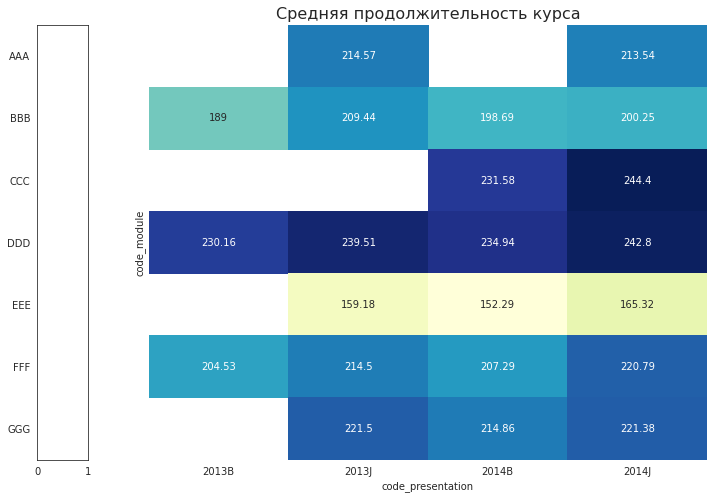

In [380]:
# функцию, строящую когортный(семестровый) анализ по средней продолжительности и среднему значению завершаемости,
#я написать, к сожалению, не смогла, но построила некрасивую маленькую табличку с коготным анализом
#по средней продолжительности курса, по которой однако можно делать выводы

duration_pivot=cohorts.pivot_table(index='code_module' ,
                                     columns='code_presentation' ,
                                     values='avg_duration')

with sns.axes_style("white"): 
    fig, ax=plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    ax[1].set_title('Средняя продолжительность курса', fontsize=16)
   
    sns.heatmap(duration_pivot,
                cmap="YlGnBu",
                annot=True, 
                cbar=False, 
                fmt='g')

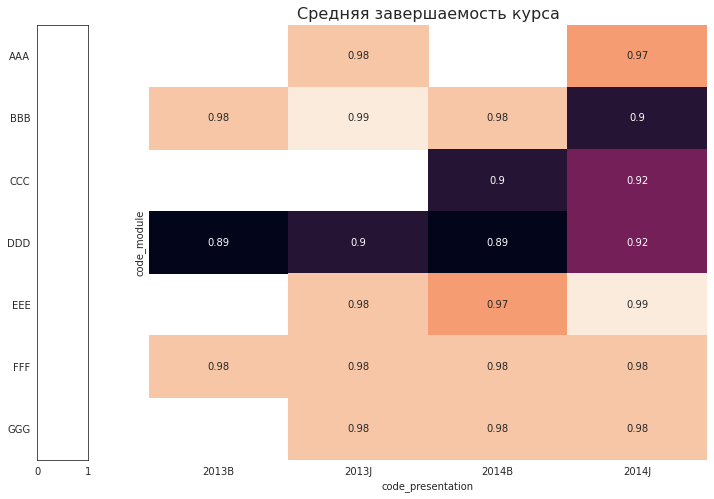

In [381]:
# и еще одну для среднего значения завершаемости
rate_pivot=cohorts.pivot_table(index='code_module',
                                     columns='code_presentation',
                                     values='rate')


with sns.axes_style("white"): 
    fig, ax=plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    ax[1].set_title('Средняя завершаемость курса', fontsize=16)
   
    sns.heatmap(rate_pivot,
                annot=True, 
                cbar=False, 
                fmt='g')

In [382]:
#Задание 6
#Построй адаптированные под задачу обучения RFM-кластеры студентов.
#Где R — среднее время сдачи одного экзамена, F — завершаемость курсов,
#M — среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры.

In [383]:
#сначала узнаем среднее количество баллов и среднее время сдачи одного экзамена
# (под экзаменом понимаю задние любого типа)
score_and_task=df.groupby('id_student', as_index=False).agg({'score': 'mean','date_submitted': 'mean'})\
.rename(columns={'score': 'mean_score_per_task','date_submitted': 'mean_time_per_task'}).round(2)

In [384]:
score_and_task

,id_student,mean_score_per_task,mean_time_per_task
0,6516,61.80,111.60
1,8462,87.00,23.00
2,11391,82.00,112.40
3,23629,82.50,55.75
4,23698,74.44,133.44
...,...,...,...
23364,2698251,58.14,121.43
23365,2698257,67.80,116.20
23366,2698535,39.25,90.38
23367,2698577,64.40,106.20


In [385]:
#найдем завершаемость курсов для каждого студента, посчитаем сколько
#курсов он всего начал(начатые курсы + законченные курсы) и разделим на количество законченных курсов
completed_courses=studentRegistration.query("date_unregistration == 'NaN'").groupby('id_student', as_index=False)\
.agg({'code_module': 'nunique'}).sort_values('code_module').rename(columns={'code_module': 'compl_courses'})

In [386]:
completed_courses

,id_student,compl_courses
0,6516,1
13963,623289,1
13962,623276,1
13961,623263,1
13959,623240,1
...,...,...
2402,339853,2
9225,574310,2
9224,574283,2
6606,537811,3


In [387]:
UNcompl_courses=studentRegistration.query("date_unregistration != 'NaN'")\
.groupby('id_student', as_index=False)\
.agg({'code_module': 'nunique'}).sort_values('code_module').rename(columns={'code_module': 'UNcompl_courses'})

In [388]:
UNcompl_courses

,id_student,UNcompl_courses
0,3733,1
5949,625790,1
5946,625751,1
5945,625667,1
5944,625619,1
...,...,...
3138,551528,3
1318,399863,3
2474,524431,3
6860,649230,3


In [389]:
all_courses=UNcompl_courses.merge(completed_courses, on='id_student', how='outer').fillna(0)
all_courses['all_started_courses']=all_courses['UNcompl_courses'] + all_courses['compl_courses']
all_courses['completion_rate']=all_courses['compl_courses'] / all_courses['all_started_courses'] * 100
all_courses.drop(columns={'UNcompl_courses','compl_courses','all_started_courses'}, inplace=True)

In [390]:
all_courses

,id_student,completion_rate
0,3733,0.0
1,625790,50.0
2,625751,0.0
3,625667,0.0
4,625619,0.0
...,...,...
28780,339853,100.0
28781,574310,100.0
28782,574283,100.0
28783,537811,100.0


In [391]:
#объединили все нужные показатели в один датафрейм и убрали те строки где был хотя бы один NaN,
#так как их не получится определить в како-то кластер 
clasters=score_and_task.merge(all_course, on='id_student', how='outer' ).dropna()
clasters

,id_student,mean_score_per_task,mean_time_per_task,completion_rate
0,6516,61.80,111.60,100.0
1,8462,87.00,23.00,0.0
2,11391,82.00,112.40,100.0
3,23629,82.50,55.75,100.0
4,23698,74.44,133.44,100.0
...,...,...,...,...
23364,2698251,58.14,121.43,100.0
23365,2698257,67.80,116.20,100.0
23366,2698535,39.25,90.38,50.0
23367,2698577,64.40,106.20,100.0


In [392]:
clasters.describe()

,id_student,mean_score_per_task,mean_time_per_task,completion_rate
count,2.335100e+04,23351.000000,23351.00000,23351.000000
mean,7.092954e+05,73.142592,100.13336,82.486118
std,5.558086e+05,15.541062,41.47321,35.944590
min,6.516000e+03,0.000000,-4.00000,0.000000
25%,5.046185e+05,65.000000,74.33000,100.000000
50%,5.895780e+05,76.000000,109.71000,100.000000
75%,6.451520e+05,84.330000,124.86000,100.000000
max,2.698588e+06,100.000000,315.56000,100.000000


In [393]:
# создаем колонки "R — среднее время сдачи одного экзамена, 
#F — завершаемость курсов, M — среднее количество баллов"
# с разделением на кластеры (для этого посмотрим описание значений колонок)
clasters['R']=pd.cut(clasters["mean_time_per_task"], [-5, 74, 124, 316], labels=[1,2,3])
clasters['F']=pd.cut(clasters["completion_rate"], [-1, 51, 76, 101 ], labels=[1,2,3])
clasters['M']=pd.cut(clasters["mean_score_per_task"], [-1, 66, 77, 101 ], labels=[1,2,3])

In [394]:
clasters

,id_student,mean_score_per_task,mean_time_per_task,completion_rate,R,F,M
0,6516,61.80,111.60,100.0,2,3,1
1,8462,87.00,23.00,0.0,1,1,3
2,11391,82.00,112.40,100.0,2,3,3
3,23629,82.50,55.75,100.0,1,3,3
4,23698,74.44,133.44,100.0,3,3,2
...,...,...,...,...,...,...,...
23364,2698251,58.14,121.43,100.0,2,3,1
23365,2698257,67.80,116.20,100.0,2,3,2
23366,2698535,39.25,90.38,50.0,2,1,1
23367,2698577,64.40,106.20,100.0,2,3,1


In [395]:
#теперь создаем колонку с RFM кластером для каждого студента
clasters=clasters.astype({'R': 'str','F': 'str','M': 'str'})
clasters['RFM']=clasters['R'] + clasters['F'] + clasters['M']
clasters.drop(columns={'mean_score_per_task','mean_time_per_task','completion_rate','R','F','M'},inplace=True)

In [396]:
clasters

,id_student,RFM
0,6516,231
1,8462,113
2,11391,233
3,23629,133
4,23698,332
...,...,...
23364,2698251,231
23365,2698257,232
23366,2698535,211
23367,2698577,231


In [397]:
#получились вот такие кластеры вот в таком количестве
clasters.value_counts('RFM')

RFM
233    5481
333    3247
232    2654
231    2140
332    1498
111    1437
131    1129
113    1041
331    1017
112     836
133     730
132     643
211     460
213     436
212     328
312      76
311      71
313      64
221      16
223      10
322      10
222       8
323       7
321       6
121       3
123       2
122       1
dtype: int64